# [BERTによる類似文書の検索](https://lab.m-field.co.jp/2020/11/30/search-by-bert/)

## TimeZone

In [ ]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Japan /etc/localtime
!date

Tue Jul  6 17:46:54 JST 2021


## 変数設定

In [ ]:
# clients = ["kosfja", "clb", "nu"]
clients = ["clb"]

In [ ]:
from_date = "2021-01-01"

In [ ]:
#to_date = "2021-03-31"
to_date = "2021-01-31"

In [ ]:
project_id = 'bwing-230309'

## Provide your credentials to the runtime

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

In [ ]:
%load_ext google.colab.data_table

In [ ]:
from google.cloud import bigquery

def query(project_id, client_id, from_date, to_date):
  client = bigquery.Client(project=project_id)

  print((project_id, client_id, from_date, to_date))
  
  df = client.query(f'''
  SELECT
    client,
    quest_item_name AS text,
  FROM
    `bwing-230309.whatya.log_info`
  WHERE
    client = '{client_id}'
    AND quest_item_name != ''
    AND quest_item_name NOT IN ('init', 'init_bot', 'init_op', 'LINKAGE-Newest')
    AND REGEXP_EXTRACT(quest_item_name, '(テスト)') IS NULL
    AND date BETWEEN '{from_date}' AND '{to_date}'
  ORDER BY timestamp
  ''').to_dataframe()
  # print(df.head(10))
  return df

In [ ]:
import os
import numpy as np

groups = clients

texts  = []
labels = []

for group in groups:
    client_id = group
    df = query(project_id, client_id, from_date, to_date)

    # for t in df['quest_item_name']:
    for t in df['text']:
        if t != []:
            texts.append(t) 
            labels.append(group)
labels = np.array(labels) 

('bwing-230309', 'clb', '2021-01-01', '2021-01-31')


In [ ]:
#print(texts)
len(texts)

1687

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(labels, texts)), columns = ['client', 'text'])

In [ ]:
# df.head()

## 下準備

In [ ]:
%%bash
# データセットのダウンロード
# wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz
# tar xvzf ldcc-20140209.tar.gz
# ライブラリのインストール
apt install aptitude swig
aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
#pip install mecab-python3==0.996.5
pip install mecab-python3
#pip install unidic-lite nlplot japanize-matplotlib transformers fugashi ipadic
pip install unidic-lite japanize-matplotlib transformers fugashi ipadic
#pip install nlplot==1.2.0

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  l



ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.


In [ ]:
%%bash
pip install pandas numpy tqdm seaborn matplotlib wordcloud pillow networkx ipython scikit-learn
pip install plotly>=4.12.0 -U
pip install pyLDAvis==2.1.2
pip install nlplot==1.2.0

In [ ]:
!pip install ginza

     |████████████████████████████████| 10.4MB 13.1MB/s 
     |████████████████████████████████| 51.5MB 56kB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 1.1MB 32.8MB/s 
     |████████████████████████████████| 481kB 26.2MB/s 
  Created wheel for ginza: filename=ginza-4.0.6-cp37-none-any.whl size=15793 sha256=11ffae01b658dab548788a67ecda634db63e54b0e311b5dc548595caadbe4914
  Stored in directory: /root/.cache/pip/wheels/7e/37/14/80b8f727f6adb2b00377bca3ddf9d9a999aecff97ee0a3017c
  Created wheel for ja-ginza: filename=ja_ginza-4.0.0-cp37-none-any.whl size=51530814 sha256=5b995ba817591de149a84114717fbd04d9291b802ff52ce9e4d376ee65b2492d
  Stored in directory: /root/.cache/pip/wheels/28/5a/c0/95ac590b39eff99c77d729f284341d15a6903e4011d70ff421
  Created wheel for SudachiPy: filename=SudachiPy-0.5.2-cp37-cp37m-linux_x86_64.whl size=870201 sha256=33b8c3f20e92d60d4fdf337acaeeafbf18cfa9a627e89cf6b6479051ccdbda69
  Stored in directory: /root/.cac

In [ ]:
#!pip install --upgrade plotly

     |████████████████████████████████| 20.6MB 1.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 9.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=4739116cccc15c3adb47c38b27b447d4e8a257fac7303e1b14db4f74723e9442
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
  Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [ ]:
import pkg_resources, imp
imp.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

## データセットの読み込み

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import nlplot
import warnings
warnings.simplefilter('ignore')    
import torch
import transformers
from transformers import BertJapaneseTokenizer
import logging
logging.getLogger("transformers.tokenization_utils_base").setLevel(logging.ERROR) # tokenize時の警告を抑制
# def load_dataset():
#     """データセットの読み込み"""
#     paths = []
#     for dirpath, dirnames, filenames in os.walk('./text'):
#         for file in filenames:
#             if re.match(r'.+[0-9].txt',  file):
#                 #print("{0}".format(file))
#                 paths.append(os.path.join(dirpath, file))                
#     data = {
#         'path': [],
#         'URL': [],
#         'date': [],
#         'title': [],
#         'text': [],
#     }
#     for path in paths:
#         with open(path, 'r') as f:
#             url = f.readline().strip('¥n')
#             date = f.readline().strip('¥n')
#             title = f.readline().strip('¥n')
#             text = f.read()
#             data['path'].append(path)
#             data['URL'].append(url)
#             data['date'].append(date)
#             data['title'].append(title)
#             data['text'].append(text)
#     return pd.DataFrame(data)
# df = load_dataset()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



## 文書の特徴ベクトル化

In [ ]:
#!pip install transformers==3.0.0

In [ ]:
class BertExtractor:
    """文書特徴抽出用クラス"""
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu' #GPUが使用可能ならGPUを使用
        self.model_name = 'cl-tohoku/bert-base-japanese-whole-word-masking' #使用する学習済みモデル名
        self.tokenizer = BertJapaneseTokenizer.from_pretrained(self.model_name) #使用するBERTトークナイザー
        self.bert_model = transformers.BertModel.from_pretrained(self.model_name) #学習済みモデル呼び出し
        self.bert_model = self.bert_model.to(self.device)
        self.max_len = 128 #使用する入力文書の長さ。最大512まで
    
    def extract(self, sentence):
        """文書特徴ベクトルを抽出する"""
        # 文書のトークナイズ
        inp = self.tokenizer.encode(sentence)
        len_inp = len(inp)
        # 入力トークン数の調整
        if len_inp >= self.max_len:
            inputs = inp[:self.max_len]
        else:
            inputs = inp + [0] * (self.max_len - len_inp)
        # モデルへ文書を入力し特徴ベクトルを取り出す
        inputs_tensor = torch.tensor([inputs], dtype=torch.long).to(self.device)        
        seq_out, _ = self.bert_model(inputs_tensor, return_dict=False)
        if torch.cuda.is_available():    
            return seq_out[0][0].cpu().detach().numpy() # 0番目は [CLS] token, 768 dim の文章特徴量
        else:
            return seq_out[0][0].detach().numpy()

In [ ]:
def cos_sim_matrix(matrix):
    """文書間のコサイン類似度を計算し、類似度行列を返す"""
    d = matrix @ matrix.T
    norm = (matrix * matrix).sum(axis=1, keepdims=True) ** .5
    return d / norm / norm.T

In [ ]:
bex = BertExtractor()
df['text_feature'] = df['text'].progress_apply(lambda x: bex.extract(x)) # 文書の特徴ベクトル化
sim = cos_sim_matrix(np.stack(df.text_feature)) # 類似度行列

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 類似文書の検索

In [ ]:
def search(n=100):
    # doc = df.sample(1)
    doc = df.head(1)
    doc_idx = doc.index[0]
    sim_index = sim[doc_idx].argsort()[::-1]
    rec_df = df.iloc[sim_index][:n]
    rec_df['similarity'] = np.sort(sim[doc_idx])[::-1][:n]
    #return rec_df[['title', 'text', 'similarity']]
    return rec_df[['client', 'text', 'similarity']]

# df2 = search()
# df2 = search(1000)
df2 = search(len(df))

In [ ]:
len(df2)

1687

## 検索結果の可視化

In [ ]:
#def tokenize(text,):
#    tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
#    wakati_ids = tokenizer.encode(text, return_tensors='pt')
#    tokens = tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist())
#    return tokens[1:-1] #[CLS], [SEP]トークンを除く
#
#df2['tokenized_text'] = df2['text'].progress_apply(tokenize)

In [ ]:
import spacy
import re
nlp = spacy.load('ja_ginza')

def tokenize(text):
    #tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
    #wakati_ids = tokenizer.encode(text, return_tensors='pt')
    #tokens = tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist())
    #return tokens[1:-1] #[CLS], [SEP]トークンを除く
    
    doc =nlp(text)
    tokens = []
    for token in doc:
        # print(np)
        tmp = re.sub(r'^[!-/:-@[-`{-~]$', '', token.lemma_)
        tmp = re.sub(r'^[！-／：-＠［-｀｛-～、-〜”’・ー]$', '', tmp)
        tmp = re.sub(r'^[あ-ん]{1,2}$', '', tmp)
        tmp = re.sub(r'^[\s]+$', '', tmp)
        if tmp:
            tokens.append(tmp)
    return tokens

df2['tokenized_text'] = df2['text'].progress_apply(tokenize)

In [ ]:
!pip install "fugashi[unidic-lite]" 
!pip install ipadic

In [ ]:
import torch
from transformers import (
    pipeline,
    AutoModelForSequenceClassification,
    AutoTokenizer
)

class NLP:
    def __init__(self):
        self.gen_tokenizer = AutoTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking', use_fast=False)

        #self.model = AutoModelForSequenceClassification.from_pretrained('daigo/bert-base-japanese-sentiment')
        #self.model = AutoModelForSequenceClassification.from_pretrained('bandainamco-mirai/distilbert-base-japanese')
        #self.tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

    def sentiments(self, text: str):
        if torch.cuda.is_available():
            nlp = pipeline('sentiment-analysis', model="daigo/bert-base-japanese-sentiment", tokenizer=self.gen_tokenizer, device=0)
        else:
            nlp = pipeline('sentiment-analysis', model="daigo/bert-base-japanese-sentiment", tokenizer=self.gen_tokenizer)
        result = nlp(text)[0]
        #return f"label: {result['label']}, with score: {round(result['score'], 4)}"
        #return {"label": result['label'], "score": round(result['score'], 4)}
        return result

In [ ]:
# from nlp import NLP
nlp = NLP()

def sentiments(text):
    results =nlp.sentiments(text)

    if results["label"] == 'ネガティブ' and results["score"] > 0.9:
        return results["label"] 
    elif results["label"]  == 'ポジティブ' and results["score"] > 0.9:
        return results["label"] 
    else:
        return "ニュートラル"

#print(sentiments("ケーキ食べ過ぎた、もうだめ。死にたい"))
df2['sentiment'] = df2['text'].progress_apply(sentiments)

In [ ]:
print(nlp.sentiments("うほほーい、大好き♡"))

{'label': 'ポジティブ', 'score': 0.9749482870101929}


In [ ]:
print(nlp.sentiments("ケーキ食べ過ぎた、もうだめ。死にたい"))

{'label': 'ネガティブ', 'score': 0.6267755627632141}


In [ ]:
df2.head()

,client,text,similarity,tokenized_text,sentiment
640,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]",ポジティブ
324,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]",ポジティブ
1199,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]",ポジティブ
956,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]",ポジティブ
1433,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]",ポジティブ


In [ ]:
df2.dropna(subset=['text', 'tokenized_text', 'sentiment'], how="all", inplace=True)

In [ ]:
#df2

In [ ]:
!pip install scattertext

     |████████████████████████████████| 7.3MB 6.7MB/s 
     |████████████████████████████████| 23.9MB 51.9MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=e5a47270eaeeefd4212f351eaf6415ed0022e252f6100bfce3d0bb00adc5d80c
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from spacy.lang.ja.stop_words import STOP_WORDS

In [ ]:
import ginza
stopwords = list(STOP_WORDS)
# stopwords.extend(['・', '＿', '、', '。', '?', '？', '。', '、', '(', ')', '（', '）', '・', '「', '」', '『', '』', '：', '〜', '＝', '※', '”', '“', '→', '…', '×', '！', '／', '？', '○', 'ノ', '〈', '〉', '々', '，', '＆', '☆', '―', '＋', 'α', '〒', '《', '》', '‐', '…。', '【', '】', '★', '；', '’', 'β', '（-', '−', '〔', 'μ', '〕', 'ˈ', '＞', '（）', '＜', '́', '――', '．', 'ə', 'ｍ', '［', '］', 'γ', '〇', '■', '●', 'ː', '（=', '＊', '（株）', '△', 'ε', '▲', 'π', 'φ', 'δ', '‘', '−1', 'σ', 'Δ', 'θ', 'λ', '◎', 'ω', '。(', 'Σ', '─', 'ν', 'ɛ', 'ɪ', '（+', 'Ω', 'ノルマン人', 'ρ', '□', '←', 'ゝ', '。}}', 'τ', 'Ａ', '（笑）', '×3', 'κ', 'ɔ', 'η', '＠', '（～', '′', 'ʃ', 'ノルマン', 'Ἀ', '（.', 'ο', '「(', '÷', '「～', 'ʊ', '◆', '（?', '（≒', '（（', 'ζ', '（財）', '↑', 'ι', 'Γ', 'χ', 'محمد', '〇〇', '。!', 'Λ', 'ˌ', 'ʿ', '。-', 'Ｂ', '「-', '（－', '｝', 'Ζ', '◇', 'بن', '£', 'ψ', '（(', 'Φ', '｛', '（’', 'υ', 'ʒ', 'Α', '（社）', '。}}}}', 'ノリス', 'ɾ', 'عبد', 'Ｔ', '。)', 'ɡ', 'əˈ', 'ゞ', 'ｔ', 'ノウサギ', '−2', 'ɣ', 'Π', 'ɒ', '↓', 'ʻ', '︎', '｜', 'Ｃ', 'Ε', '『’', 'Ｆ', 'ξ', 'ɑ', 'Ｍ', 'ノモス', '〆', 'Ｄ', '（”', 'Ζガンダム', 'ʌ', 'Ｈ', 'Ｖ', '￥', 'Ｘ', 'Ｊ', 'ɐ', 'ʁ', 'ɔː', '（有）', '−3', 'Ｅ', '（—', 'ɨ', '（｢', 'Ｓ', 'ʲ', '○×', 'الله', 'ｃｍ', 'ノリッチ'])
# stopwords = []

In [ ]:
stopwords

['する',
 'あ',
 'くん',
 'ひと',
 'ご',
 'それ',
 'ながら',
 'これ',
 'しまう',
 'かなり',
 'もっ',
 'べき',
 'ぶり',
 'ほか',
 'はじめ',
 'ち',
 'やっ',
 'ある',
 'まで',
 'さらに',
 'え',
 'せる',
 'に',
 'よく',
 'ば',
 'いずれ',
 'でき',
 'ところ',
 'くる',
 'たち',
 'から',
 'し',
 'つい',
 'そう',
 'なけれ',
 'なり',
 'て',
 'の',
 'ね',
 'かつ',
 'さん',
 'なお',
 'かつて',
 'つつ',
 'おり',
 'こう',
 'な',
 'ま',
 'まま',
 'つけ',
 'ない',
 'もう',
 'もの',
 'が',
 'せ',
 'なく',
 'いつ',
 'とも',
 'れ',
 'へ',
 'たり',
 'すべて',
 'なら',
 'れる',
 'うち',
 'です',
 'できる',
 'あまり',
 'よ',
 'どう',
 'だ',
 'なかっ',
 'および',
 'らしい',
 'は',
 'あり',
 'や',
 'のみ',
 'ず',
 'ぬ',
 'いう',
 'にて',
 'ごと',
 'いっ',
 'また',
 'ほぼ',
 'せい',
 'なっ',
 'あっ',
 'よっ',
 'で',
 'き',
 'ただし',
 'と',
 'よう',
 'そして',
 '一',
 'のち',
 'いわ',
 'いく',
 'ここ',
 'しか',
 'ほど',
 'その',
 'ほとんど',
 'こと',
 'ら',
 'すぐ',
 'こ',
 'る',
 'す',
 'ん',
 'いい',
 'なし',
 'しかし',
 'よれ',
 'いる',
 'あれ',
 'お',
 'この',
 'つ',
 'とき',
 'もと',
 'み',
 'か',
 'それぞれ',
 'おい',
 'おら',
 'さ',
 'だけ',
 'ちゃん',
 'なる',
 'しまっ',
 'た',
 'も',
 'おけ',
 'そこ',
 'あるいは',
 'とっ',
 'い',
 'かけ',
 'よる',
 'たい',
 'より',
 'を',

In [ ]:
import scattertext as st

nlp = spacy.load('ja_ginza')
corpus = st.CorpusFromPandas(df2, category_col='sentiment', text_col='text',  nlp=nlp).build().remove_terms(stopwords, ignore_absences=True)

In [ ]:
html = st.produce_scattertext_explorer(corpus, category='ネガティブ', 
                                       category_name='ネガティブ', 
                                       not_category_name='ニュートラル',
                                       width_in_pixels=1000)


In [ ]:
#open("Dialogue_Sentiment.html", 'wb').write(html.encode('utf-8'))
from IPython.display import HTML
HTML(html)

In [ ]:
html = st.produce_scattertext_explorer(corpus, category='ポジティブ', 
                                       category_name='ポジティブ', 
                                       not_category_name='ニュートラル',
                                       width_in_pixels=1000)

In [ ]:
#open("Dialogue_Sentiment.html", 'wb').write(html.encode('utf-8'))
from IPython.display import HTML
HTML(html)

In [ ]:
html = st.produce_scattertext_explorer(corpus, category='ポジティブ', 
                                       category_name='ポジティブ', 
                                       not_category_name='ネガティブ',
                                       width_in_pixels=1000)

In [ ]:
#open("Dialogue_Sentiment.html", 'wb').write(html.encode('utf-8'))
from IPython.display import HTML
HTML(html)

In [ ]:
npt = nlplot.NLPlot(df2, target_col='tokenized_text')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=20, min_freq=0)

In [ ]:
# bi-gram表示
npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    stopwords=stopwords,
    # save=True
)

100%|██████████| 1687/1687 [00:00<00:00, 43670.71it/s]


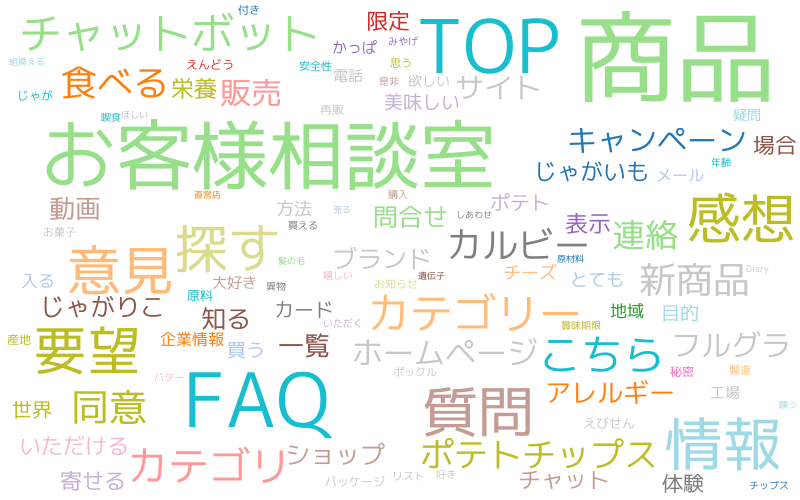

In [ ]:
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
    # save=True
)

# [自然言語を簡単に可視化・分析できるライブラリ「nlplot」を公開しました](https://www.takapy.work/entry/2020/05/17/192947)

## N-gram bar chart

In [ ]:
# 1. N-gram bar chart
npt.bar_ngram(title='uni-gram', ngram=1, top_n=50, stopwords=stopwords, save=True)

100%|██████████| 1687/1687 [00:00<00:00, 87089.87it/s]


In [ ]:
npt.bar_ngram(title='bi-gram', ngram=2, top_n=50, stopwords=stopwords, save=True)

100%|██████████| 1687/1687 [00:00<00:00, 71381.79it/s]


## N-gram tree Map

In [ ]:
# 2. N-gram tree Map
npt.treemap(title='Tree of Most Common Words', ngram=1, top_n=30, stopwords=stopwords, save=True)

100%|██████████| 1687/1687 [00:00<00:00, 99402.82it/s]


## Histogram of the word count

In [ ]:
# 3. Histogram of the word count
npt.word_distribution(title='words distribution', save=True)

## wordcloud

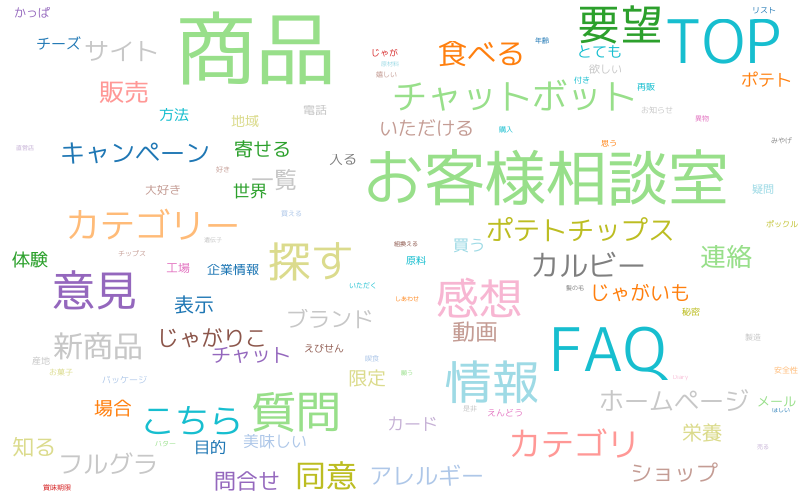

In [ ]:
# 4. wordcloud
npt.wordcloud(stopwords=stopwords, colormap='tab20_r', save=True)

## co-occurrence networks

In [ ]:
# 5. co-occurrence networks
npt.build_graph(stopwords=stopwords, min_edge_frequency=10)

# The number of nodes and edges to which this output is plotted.
# If this number is too large, plotting will take a long time, so adjust the [min_edge_frequency] well.
# >> node_size:70, edge_size:166
npt.co_network(title='Co-occurrence network', save=True)

node_size:36, edge_size:57


## sunburst chart

In [ ]:
# 6. sunburst chart
npt.sunburst(title='sunburst chart', colorscale=True, save=True)

## pyLDAvis

In [ ]:
# 7. pyLDAvis
# If you want to run it in a notebook environment, you need to use the import and magic commands
import pyLDAvis
pyLDAvis.enable_notebook()
npt.ldavis(num_topics=5, passes=5, save=True)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.242740 -0.042243       1        1  22.661003
4      0.149646 -0.178926       2        1  22.162598
0      0.130883 -0.078928       3        1  19.722071
1     -0.153891  0.029592       4        1  19.510493
3      0.116102  0.270505       5        1  15.943836, topic_info=       Term        Freq       Total Category  logprob  loglift
3        商品  323.000000  323.000000  Default  30.0000  30.0000
0       FAQ  170.000000  170.000000  Default  29.0000  29.0000
82      TOP  161.000000  161.000000  Default  28.0000  28.0000
1    お客様相談室  177.000000  177.000000  Default  27.0000  27.0000
220      要望   86.000000   86.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
149       味    2.672051   41.908230   Topic5  -5.5346  -0.9165
381      プロ    1.965241    3.571531   Topic5  -5.8418   1.2387
453      出る    1.986451    5.141663   Topic5  -5.8310   0.8851
21      られる    1.958566    6.268868   Topic5  -5.8452   0.6727
24     フルグラ    2.017006   24.776445   Topic5  -5.8158  -0.6722

[243 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
159       1  0.383144     1
159       2  0.095786     1
159       3  0.478930     1
246       3  0.729835    11
246       5  0.182459    11
...     ...       ...   ...
8         4  0.149758   食べる
8         5  0.024960   食べる
97        1  0.733869    食育
323       3  0.825389  香ばしい
257       1  0.817983   髪の毛

[304 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])

In [ ]:
!ls -l *.html

-rw-r--r-- 1 root root 3549344 Jul  6 18:48  2021-07-06_bi-gram.html
-rw-r--r-- 1 root root 3563520 Jul  6 18:48 '2021-07-06_Co-occurrence network.html'
-rw-r--r-- 1 root root   38127 Jul  6 18:48  2021-07-06_pyldavis.html
-rw-r--r-- 1 root root 3549966 Jul  6 18:48 '2021-07-06_sunburst chart.html'
-rw-r--r-- 1 root root 3548423 Jul  6 18:48 '2021-07-06_Tree of Most Common Words.html'
-rw-r--r-- 1 root root 3548567 Jul  6 18:48  2021-07-06_uni-gram.html
-rw-r--r-- 1 root root 3550502 Jul  6 18:48 '2021-07-06_words distribution.html'


In [ ]:
%%bash
TODAY=$(date '+%Y-%m-%d')
zip ${TODAY}.zip *.html

  adding: 2021-07-06_bi-gram.html (deflated 70%)
  adding: 2021-07-06_Co-occurrence network.html (deflated 70%)
  adding: 2021-07-06_pyldavis.html (deflated 66%)
  adding: 2021-07-06_sunburst chart.html (deflated 70%)
  adding: 2021-07-06_Tree of Most Common Words.html (deflated 70%)
  adding: 2021-07-06_uni-gram.html (deflated 70%)
  adding: 2021-07-06_words distribution.html (deflated 70%)


In [ ]:
import datetime
from google.colab import files

dt_now = datetime.datetime.now()
today = dt_now.strftime('%Y-%m-%d')

files.download(f"{today}.zip".format(today))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>